<a href="https://colab.research.google.com/github/Mhmmd-Mhmmd/Net-Analysis/blob/main/edge_list_to_adjacency_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sample_emails (1).csv')
df.drop(columns='file', inplace=True)

In [ ]:
data = df.copy()

In [ ]:
data

,Unnamed: 0,message
0,0,Message-ID: <18782981.1075855378110.JavaMail.e...
1,1,Message-ID: <15464986.1075855378456.JavaMail.e...
2,2,Message-ID: <24216240.1075855687451.JavaMail.e...
3,3,Message-ID: <13505866.1075863688222.JavaMail.e...
4,4,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
1996,1996,Message-ID: <16395321.1075855675263.JavaMail.e...
1997,1997,Message-ID: <7169843.1075855675284.JavaMail.ev...
1998,1998,Message-ID: <9594448.1075855675305.JavaMail.ev...
1999,1999,Message-ID: <24852092.1075855675327.JavaMail.e...


In [ ]:
def target_extraction(string: str):
    text = string.splitlines()
    text = text[:text.index('')]
    has_to = False
    idx_start = None
    idx_end = None

    for line in text:
        if line[:3] == 'To:':
            # print(line)
            has_to = True
            idx_start = text.index(line)
        elif line[:8] == 'Subject:':
            idx_end = text.index(line)

    if has_to:
        res = ' '.join(text[idx_start:idx_end])
        return [i.strip() for i in res[3:].split(',')]
    else:
        return np.nan

In [ ]:
def source_extraction(string: str):
    text = string.splitlines()
    text = text[:text.index('')]
    has_to = False
    idx_start = None
    idx_end = None

    for line in text:
        if line[:3] == 'To:':
            # print(line)
            has_to = True
        elif line[:5] == 'From:':
            idx_start = text.index(line)

    if has_to:
        for line in text:
            if line[:3] == "To:":
                idx_end = text.index(line)
    else:
        for line in text:
            if line[:8] == 'Subject:':
                idx_end = text.index(line)


    res = ' '.join(text[idx_start:idx_end])
    return [i.strip() for i in res[5:].split(',')]

In [ ]:
def text_extraction(string: str):
    text = string.splitlines()
    text = text[text.index(''):]

    return ' '.join(text)

In [ ]:
data['source'] = data['message'].apply(lambda x: source_extraction(x))
data['target'] = data['message'].apply(lambda x: target_extraction(x))
data['email']  = data['message'].apply(lambda x: text_extraction(x))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.explode('source', ignore_index=True)
data = data.explode('target', ignore_index=True)

In [ ]:
pd.crosstab(index=data['source'],
            columns=data['target'])

target,8774820206@pagenetmessage.net,a..allen@enron.com,a..gomez@enron.com,a..hughes@enron.com,a..lindholm@enron.com,a..martin@enron.com,a..price@enron.com,a..roberts@enron.com,a..shankman@enron.com,a.hernandez@enron.com,...,william.smith@enron.com,william.stuart@enron.com,willis.philip@enron.com,y..resendez@enron.com,yevgeny.frolov@enron.com,yuan.tian@enron.com,ywang@enron.com,zachary.mccarroll@enron.com,zachary.sampson@enron.com,zimam@enron.com
source,,,,,,,,,,,,,,,,,,,,,
1.11913372.-2@multexinvestornetwork.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adrianne.engler@enron.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
al.pollard@newpower.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alyse.herasimchuk@enron.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anchordesk_daily@anchordesk.zdlists.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
winnerannouncements@info.iwon.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wise.counsel@lpl.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yahoo-delivers@yahoo-inc.com,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# making adjacency matrix

In [ ]:
n_nodes = len(np.unique(data[['source', 'target']]))

In [ ]:
n_nodes

1114

In [ ]:
nodes_dict = {}
for i, node in enumerate(np.unique(data[['source', 'target']])):
    nodes_dict[node] = i
# nodes_dict

In [ ]:
adj_matrix = np.zeros((n_nodes, n_nodes))
adj_matrix.shape

(1114, 1114)

In [ ]:
for i in range(len(data)):
    source = nodes_dict[data.loc[i, 'source']]
    target = nodes_dict[data.loc[i, 'target']]

    adj_matrix[source][target] += 1

In [ ]:
adj_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
G = nx.from_numpy_array(adj_matrix)

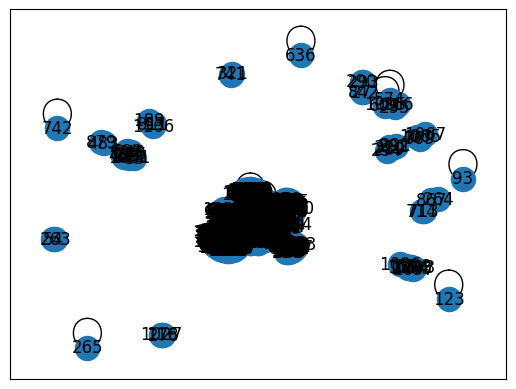

In [ ]:
nx.draw_networkx(G)

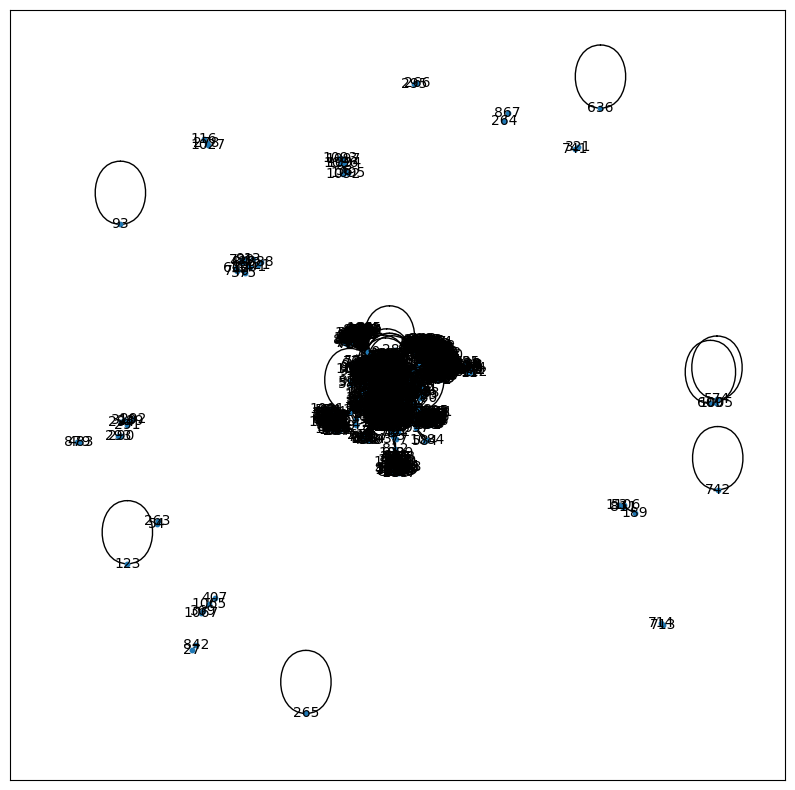

In [ ]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_size=10, font_size=10)

In [ ]:
data[['source', 'target']].to_csv('./edges.csv')

# Building GNN for node classification

In [ ]:
dada